In [1]:
"""Plots for Hydrogen Mass function for all Snaps"""

# import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput
from Functions import *

fname_in = "imapping_testrun/meraxes.hdf5" # Get the file name for the meraxes file we are using
h = meraxes.set_little_h(0.7)# By specifying Hubble parameter: h=0.7, we are ensuring that all of the galaxy properties

# Read in all the snap shots using the function 'read snaplist'. Little h previously set as 0.7
snaplist = meraxes.io.read_snaplist(fname_in, h)
snaps = snaplist[0]
redshifts=snaplist[1]
lt_times=snaplist[2]
# Print the values if you want to see
print ('snaps: ', snaps)
print('redshifts: ', redshifts)
print('light travel time: ', lt_times)


#plt.title("Hydrogen Mass Function for all Snap Shots")
'''     
# You can also see the units of all galaxy properties (and grids properties if
# they are present).  Here I am only printing the galaxy properties.

units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
print()
'''

snaps = list(snaps)
# for each snapshot...


snaps:  [100 115 134 158 173 192 216 250]
redshifts:  [4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
light travel time:  [12231.24679633 11881.54868823 11283.32371736 10185.99335738
  9241.64988071  7682.30347798  5035.97124274     0.        ]


In [2]:
# GET DATA FROM FILES
# ZWAAN 2005 DATA SET
file_Zwaan = open("data/HIMF_Zwaan2005.data", "r")
fileread_Zwaan = file_Zwaan.readlines()
for line in fileread_Zwaan:
    if line.startswith("#"):
        continue # skips that iteration 

data_Zwaan = np.loadtxt(fileread_Zwaan, delimiter=" ")
#print(data_Zwaan)
log_MHI_Zwaan = data_Zwaan[:,0]
print('Zwaan 2005')
print('log_MHI : ', log_MHI_Zwaan)
log_HIMF_Zwaan = data_Zwaan[:,1]
print('log_HIMF : ', log_HIMF_Zwaan)

# MARTIN 2010 DATA SET FOR 1/ V_max Method
file_Martin_VMAX = open("data/HIMF_Martin2010_1-VMAX.data", "r")# from here on Data from Martin 2010 1/VMax method will be referred to as data_MV
fileread_MV = file_Martin_VMAX.readlines()
for line in fileread_MV:
    if line.startswith("#"):
        continue # skips that iteration 

data_MV = np.loadtxt(fileread_MV, delimiter="  ") 
#print(data_Zwaan)
log_MHI_MV = data_MV[:,0]
print('Martin 1/ V_{max} 2010')
print('log_MHI : ', log_MHI_MV)
log_HIMF_MV = data_MV[:,1]
print('log_HIMF : ', log_HIMF_MV)




Zwaan 2005
log_MHI :  [ 7.186   7.3345  7.483   7.6315  7.78    7.9285  8.077   8.2255  8.374
  8.5225  8.671   8.8195  8.968   9.1165  9.265   9.4135  9.562   9.7105
  9.859  10.0075 10.156  10.3045 10.453  10.6015 10.75  ]
log_HIMF :  [-0.733  -0.8838 -1.1    -1.056  -1.207  -1.35   -1.315  -1.331  -1.308
 -1.31   -1.455  -1.555  -1.55   -1.69   -1.735  -1.843  -1.974  -2.166
 -2.401  -2.785  -3.013  -3.417  -4.044  -4.83   -5.451 ]
Martin 1/ V_{max} 2010
log_MHI :  [ 6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9
  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9]
log_HIMF :  [-0.743 -0.839 -0.875 -0.935 -1.065 -1.13  -1.163 -1.224 -1.363 -1.46
 -1.493 -1.573 -1.664 -1.689 -1.673 -1.74  -1.893 -2.061 -2.288 -2.596
 -3.006 -3.641 -4.428 -5.32 ]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [   263    376    506    672   1136   1375   1667   2003   2556   3273
   4632   7949  13922  24025  38224  56317  75502  95672 111707 117569
 108385  84055  55104  32518  18562  10576   6250   3613   1987   1018
    464    208     88     24     12      6      0      1      0      0
      0      0      0      0      0      0      0      0      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [   369    500    872    745   1012   1227   1728   2326   3328   4574
   7551  11282  18136  28129  42794  63287  89120 118028 145029 162484
 156835 127170  86204  52837  31705  19493  12437   8335   5373   3253
   1827   1031    496    228    101     30     12      3      2      1
      0      0      0      0      0      0      0      0      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [   419    470    588    859   1040   1400   2879   2908   4181   5986
   9089  13690  20593  31643  49194  70953 101971 140967 179620 204998
 197535 161056 115063  77220  50286  33148  22186  15577  11239   7910
   5222   3261   1845   1033    529    232     88     35     17      9
      3      2      1      1      0      0      0      0      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [   473    848   1480   1075   1438   1833   2486   3752   5214   7810
  11515  17056  27143  39748  58516  86947 126519 171728 208955 218248
 198952 161840 121934  86837  59998  40619  28570  21102  16046  12124
   9161   6409   4468   2903   1681    905    415    186     89     28
     19      8      3      3      1      0      0      0      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [  1191    870   1245   1444   2085   2748   3668   5102   6921  10348
  14724  22760  33475  47682  71321 104664 148217 190436 215464 211525
 184323 146098 107153  76070  53459  38347  28190  21654  16709  13013
   9670   7195   5254   3622   2343   1417    727    350    112     65
     34     13     12      7      6      1      2      0      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [  1262   1602   2147   2882   3683   4711   5970   8001  10794  15311
  21857  30172  41812  60464  87178 121616 159929 187227 193619 179901
 156286 128665 103302  78660  58504  41822  30025  22053  16431  12452
   9346   7277   5404   3884   2773   1711   1044    478    213    105
     46     17     14      8      5      2      3      1      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [  2086   2655   3528   4551   5923   7432   9855  12711  17320  23442
  31161  41759  57027  78378 107840 139875 165387 173712 167400 150120
 127338 105187  84999  66447  50461  36502  25955  18639  13416   9982
   7626   5871   4684   3347   2398   1632   1030    554    258    112
     37     19      6      5      9      9      5      1      0      0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


N_gals  :  [  3650   4937   6327   8231  10545  13208  17059  21890  27908  35837
  46766  62149  83141 108465 131755 148411 152405 146191 129912 109999
  89036  70514  53703  39941  29249  20673  14036   9811   7224   5489
   4448   3456   2702   2015   1412    916    579    339    166     62
     28     12      7      7      3      7      5      1      0      2]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

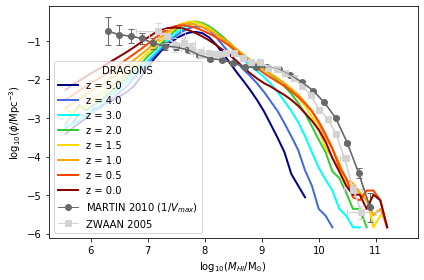

In [3]:
# CREATE EMPTY FIGURE
fig, ax = plt.subplots(1, 1)

for i in snaps:
    
    # Get galaxy catalogue
    gals, sim_props = meraxes.read_gals(fname_in, i, sim_props=True) #read in galaxies
    # The units of HI Mass ouput by the model are 1e10 Msol.  Let's convert
    # this to log10(M/Msol).
    gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
    #print('gals HI Mass: ', gals["HIMass"])

    # HImf = "HIMass" munge function used
    HImf = ALICE_mass_function(gals["HIMass"], sim_props["Volume"], bins=50,
                             range=(5.5, 11.5))

    # Plot the HI mass function
    snapshot_used = str(i)
    #print(snapshot_used)
    snaplist_index_used = snaps.index(i)# convert to list and find the index of the snap we are using
    redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
    redshift_used = round(redshift_used, 1) # round float to nearest whole int
    #print(redshift_used)
    redshift_used=str(redshift_used)
    plot_number = ('plot_' + redshift_used)

    # Change color depending on redshift
    if redshift_used == '0.0':
        color_plot = 'darkred'
    elif redshift_used == '0.5':
        color_plot = 'orangered'
    elif redshift_used == '1.0':
        color_plot = 'orange'
    elif redshift_used == '1.5':
        color_plot = 'gold'
    elif redshift_used == '2.0':
        color_plot = 'limegreen'
    elif redshift_used == '3.0':
        color_plot = 'cyan'
    elif redshift_used == '4.0':
        color_plot = 'royalblue'
    else:
        color_plot = 'darkblue'

    #print(plot_number)
    ax.plot(HImf[:, 0], np.log10(HImf[:, 1]), color=color_plot, lw=2,
            label=("z = " + redshift_used))

# PLOT THE DATA
label_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
label_ZWAAN =('ZWAAN 2005')


# MARTIN 2010
ax.plot(data_MV[:,0], data_MV[:,1], marker='o',color='dimgray',lw=1,
        label=label_MARTIN)
ax.errorbar(data_MV[:,0], data_MV[:,1],xerr=None,yerr=data_MV[:,2], 
            color='dimgray',elinewidth=1,capsize=3)

# ZWAAN 2005
ax.plot(data_Zwaan[:,0], data_Zwaan[:,1], marker='s',color='lightgray',
        lw=1, label=label_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(data_Zwaan[:,0], data_Zwaan[:,1], xerr=data_Zwaan[:,2], yerr=data_Zwaan[:,3],
            color='lightgray',elinewidth=1,capsize=3)

# Add the legend
ax.legend(title=("DRAGONS"), loc="lower left")

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_allz_wDATA")
plt.savefig("plots/wDATA/" + name_of_plot + ".pdf")

N_gals  :  [  3650   4937   6327   8231  10545  13208  17059  21890  27908  35837
  46766  62149  83141 108465 131755 148411 152405 146191 129912 109999
  89036  70514  53703  39941  29249  20673  14036   9811   7224   5489
   4448   3456   2702   2015   1412    916    579    339    166     62
     28     12      7      7      3      7      5      1      0      2]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


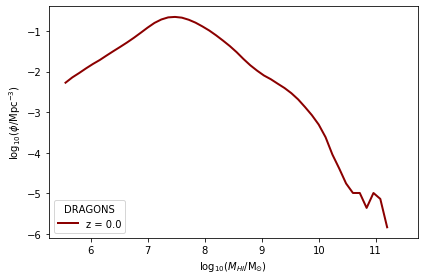

In [5]:
# CREATE EMPTY FIGURE
fig, ax = plt.subplots(1, 1)

# HImf = "HIMass" munge function used
HImf = ALICE_mass_function(gals["HIMass"], sim_props["Volume"], bins=50,
                         range=(5.5, 11.5))

# Plot the HI mass function
snapshot_used = str(i)
#print(snapshot_used)
snaplist_index_used = snaps.index(i)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest whole int
#print(redshift_used)
redshift_used=str(redshift_used)
plot_number = ('plot_' + redshift_used)

label_z = ("z = " + redshift_used)
#print(plot_number)
ax.plot(HImf[:, 0], np.log10(HImf[:, 1]), color='darkred', lw=2,
        label=label_z)

# Add the legend
ax.legend(title=("DRAGONS"), loc="lower left")

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_allz_wDATA")
plt.savefig("plots/wDATA/" + name_of_plot + ".pdf")